# Описание тестового стенда

Были закрыты все приложения, сделан bash-скрипт, который чистил кэш и запускал программу на данных. Программа была скомпилирована в release mode (dotnet build -c release)

# Датасет

In [13]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [11]:
with open("measure2.txt") as file:
    t = [int(x) for x in file]
print(t)


[8943, 9024, 8864, 8972, 9116, 8989, 9027, 8853, 8970, 8969, 9078, 8899, 8965, 9232, 9016, 8853, 8912, 9228, 8865, 8875, 9119, 9064, 9091, 8836, 8847, 8861, 8917, 9258, 9096, 9058, 9082, 8916, 8867, 9084, 9142, 9045, 9289, 9053, 8829, 8893]


# Гистограмма

(array([9., 6., 2., 4., 6., 6., 3., 0., 2., 2.]),
 array([8829., 8875., 8921., 8967., 9013., 9059., 9105., 9151., 9197.,
        9243., 9289.]),
 <BarContainer object of 10 artists>)

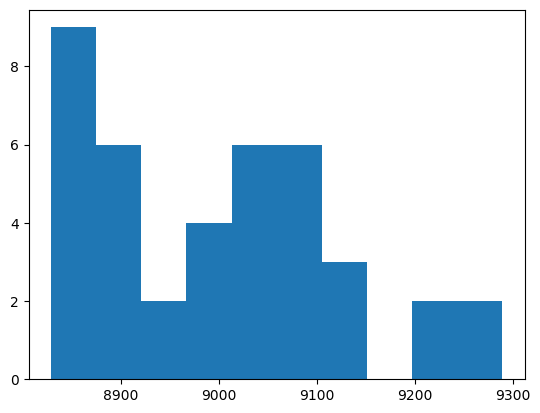

In [15]:
plt.hist(t)

# Нормальность

In [16]:
stats.normaltest(t)

NormaltestResult(statistic=2.5660905153333875, pvalue=0.2771918931272628)

In [17]:
stats.shapiro(t)

ShapiroResult(statistic=0.9376734495162964, pvalue=0.02888534963130951)

# Среднее и стандартное отклонение

In [18]:
np.mean(t)

8999.925

In [19]:
np.std(t, ddof=1)

125.8396186238047

# Доверительный интервал

In [20]:
stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)

40.24546233441452